# 서울에 전기차 충전소는 어디에 몇개가 필요해질까?
- 26년까지 전기차를 40만대까지 늘린다고 하는데
- 전기차 충전소 22만대를 보급한다고 했는데 충분한가
- 그러면 전기차 충전소는 어디에 얼마나 필요해질까?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# 지수표현식 제거하기
pd.options.display.float_format = '{:.5f}'.format

In [24]:
import koreanize_matplotlib
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

## 서울시 전기차

In [25]:
file_name = ("서울특별시 행정동별 친환경자동차 현황-제원번호 포함 자료(2022.2.28).CSV")
raw = pd.read_csv(file_name, encoding='cp949')

In [26]:
raw = raw.loc[raw['연료'] == '전기', ['기준년월', '사용본거지시읍면동_행정동기준', '차명', '연료']]
raw = raw.rename(columns={"사용본거지시읍면동_행정동기준":"주소"})
raw = raw.dropna()

In [27]:
raw["구"] = raw["주소"].map(lambda x : x.split()[1])

### 서울시 구별 전기차 수

In [28]:
df = raw.groupby("구")["차명"].count().sort_values(ascending=False).to_frame()
df = df.rename(columns={"차명" : "전기차수"})
df

,전기차수
구,
강남구,12173
구로구,3799
서초구,3495
영등포구,2388
송파구,1988
강서구,1776
성동구,1461
강동구,1293
마포구,1086


### 서울시 총 전기차 수

In [8]:
df["전기차수"].sum()

41673

## 서울시 충전소

In [31]:
ev_raw = pd.read_excel("f82bef3946130c05.xlsx")

In [32]:
ev_raw.head(2)

,운영기관,충전소,지역,시군구,주소,충전용량
0,환경부(한국자동차환경협회),DMC 산학협력연구센터,서울특별시,마포구,서울특별시 마포구 매봉산로 37,급속(100kW멀티)
1,환경부(한국자동차환경협회),Park M (주차복합빌딩),서울특별시,마포구,서울특별시 마포구 매봉산로 80,급속(200kW동시)


### 서울시 구별 충전소 갯수

In [34]:
# 시군구로 count 해보기
ev_df = ev_raw.groupby("시군구")["충전소"].count().sort_values(ascending=False).to_frame()
# index 이름을 시군구에서 구로 변경
ev_df.index = ev_df.index.set_names("구")
ev_df

,충전소
구,
강남구,2252
송파구,2106
서초구,1947
성동구,1756
강서구,1596
성북구,1483
마포구,1410
노원구,1353
구로구,1344


### 서울시 총 충전소 갯수

In [14]:
ev_df["충전소"].sum()

29556

### 두 df 합치기

In [15]:
# index 공백제거
ev_df.index = ev_df.index.str.strip()

In [16]:
df = df.merge(ev_df, left_index=True, right_index=True)
df

,전기차수,충전소
구,,
강남구,12173,2252
구로구,3799,1344
서초구,3495,1947
영등포구,2388,1228
송파구,1988,2106
강서구,1776,1596
성동구,1461,1756
강동구,1293,1272
마포구,1086,1410


### 현재 충전소당 전기차 시각화

In [17]:
df["현재충전소당전기차"] = df["전기차수"] / df["충전소"]

Text(0.5, 1.0, '현재충전소당전기차')

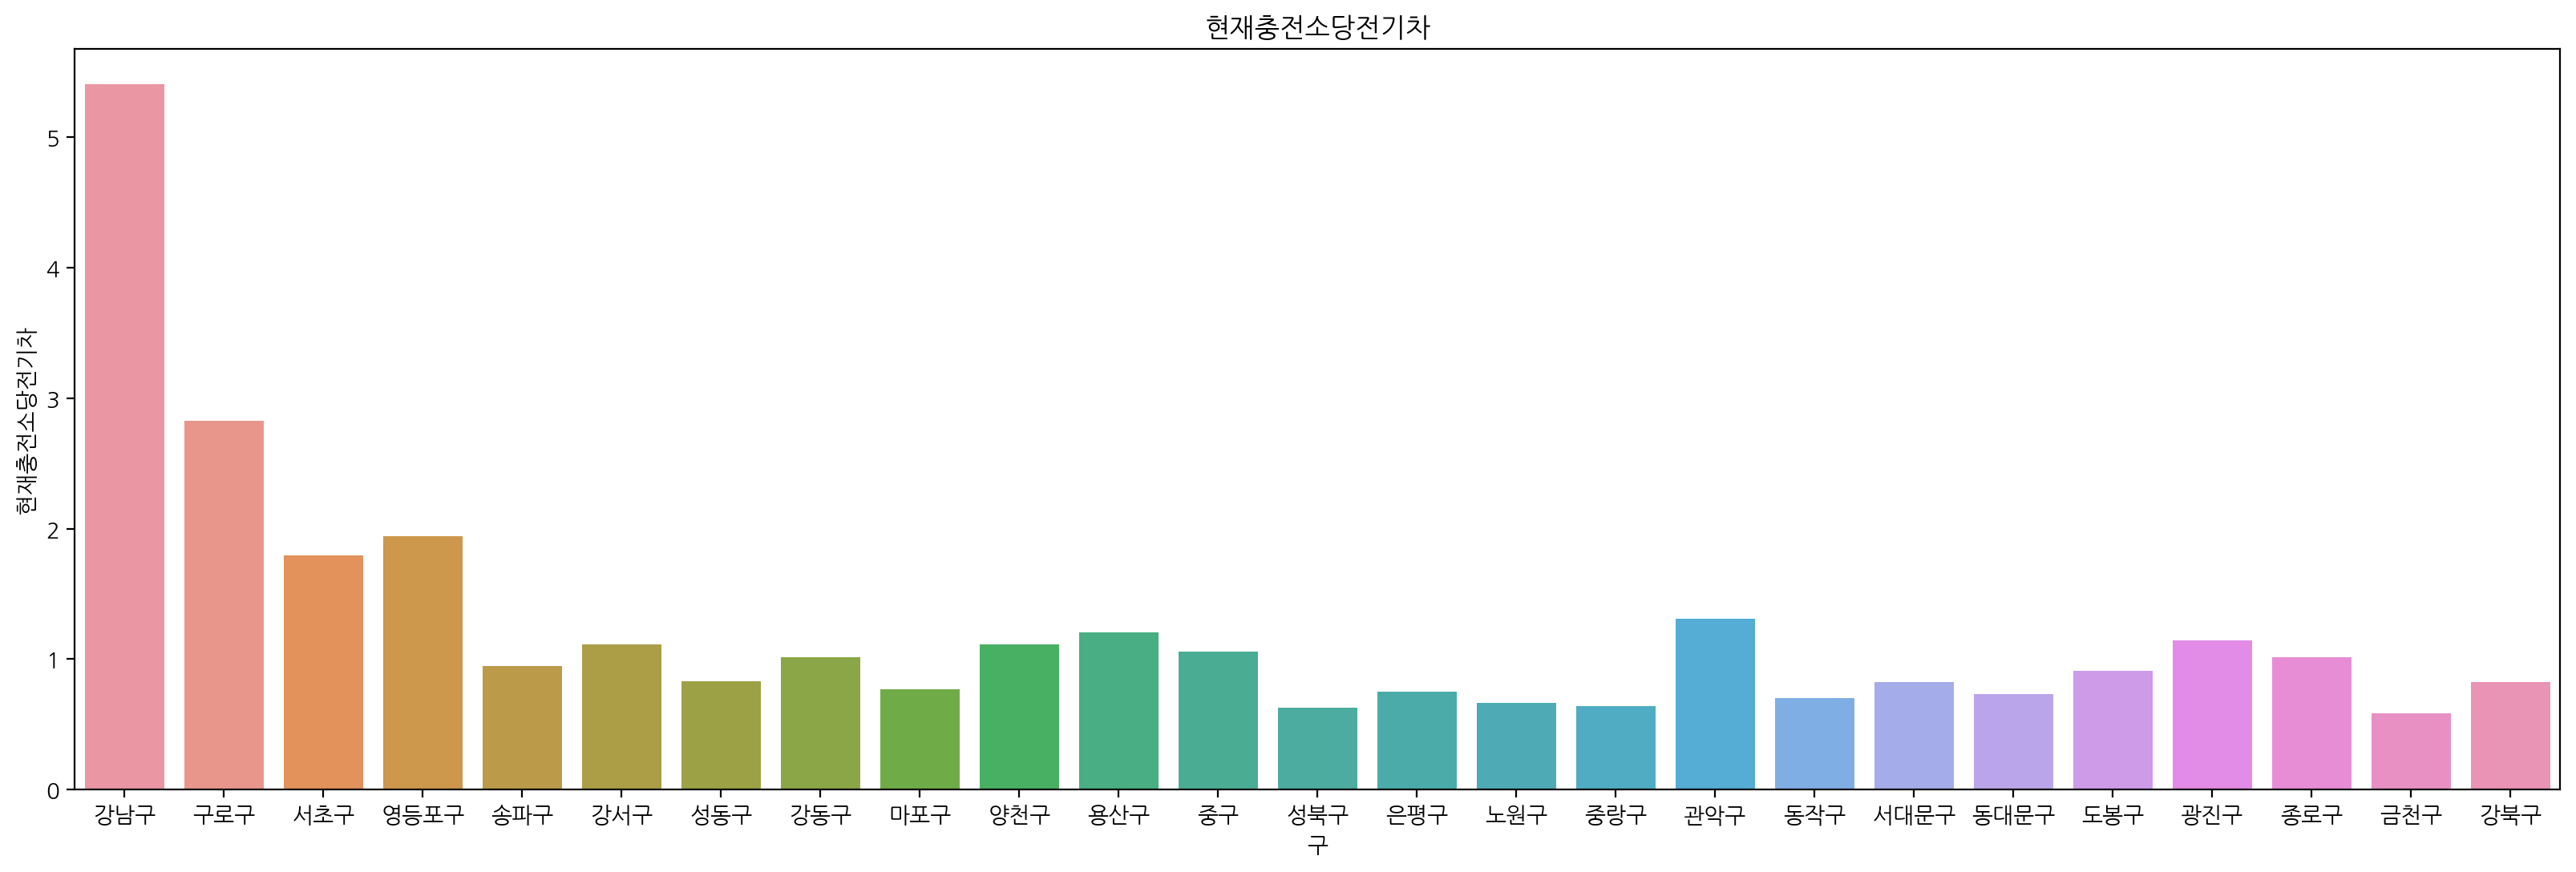

In [13]:
plt.figure(figsize=(20,6))
sns.barplot(data=df, x=df.index, y="현재충전소당전기차", ci=None).set_title("현재충전소당전기차")

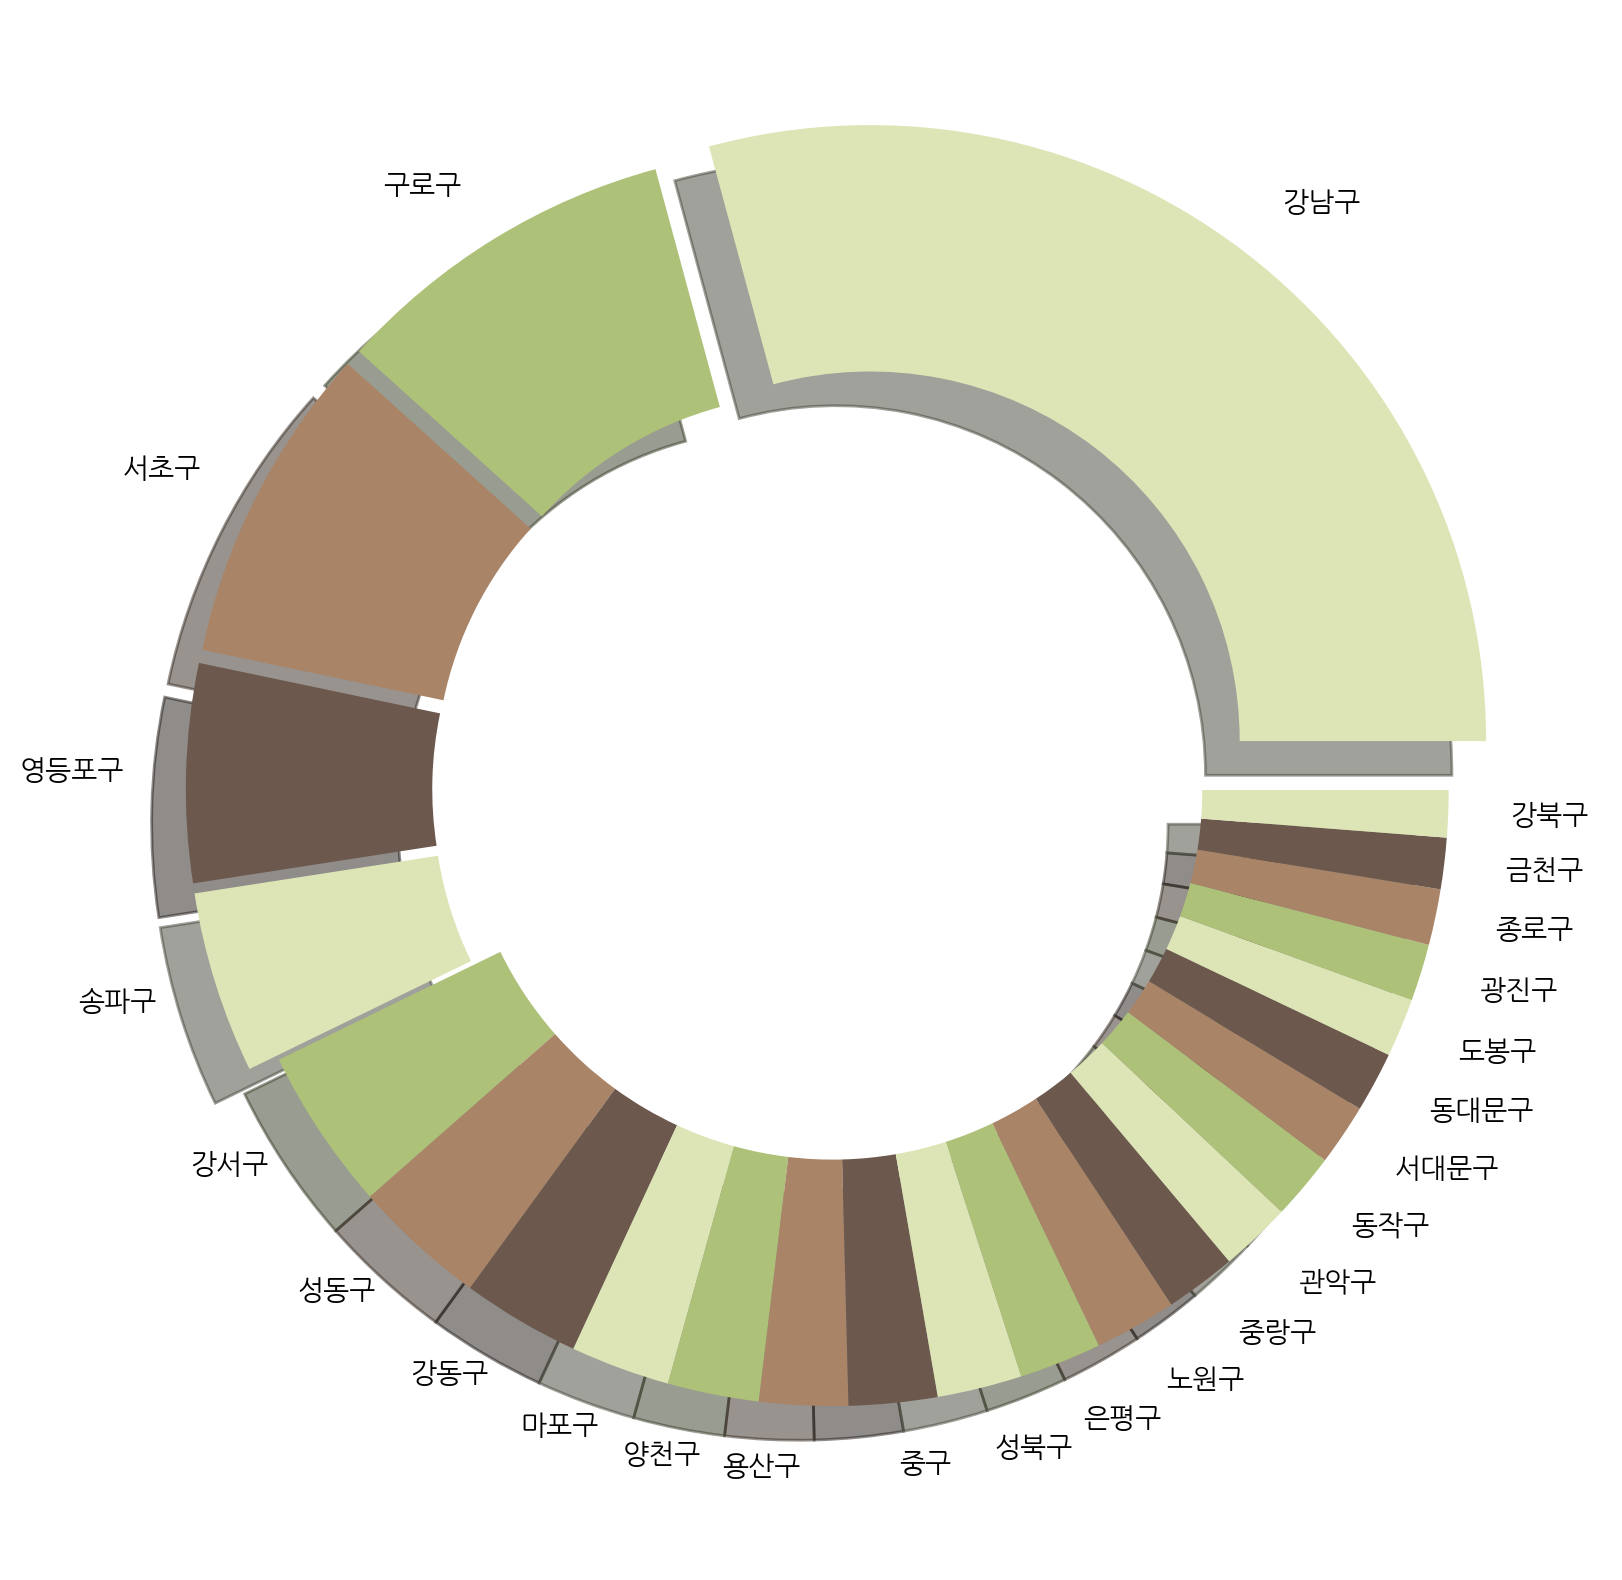

In [69]:
plt.figure(figsize=(30,10))
my_colours = ["#dde5b6", "#adc178", "#a98467", "#6c584c"]
wed={"width": 0.4}
explode = [0.1,0.05, 0.05,0.05,0.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(df["전기차수"],labels=df.index,colors=my_colours,explode=explode,wedgeprops=wed,shadow=True)
plt.show()

- 비율이 잘 안맞는 상태이다
- 이 비율대로 전기차 충전소를 늘리면 큰 불편을 겪을 수도 있다. 

# 미래 서울시 전기차는 총 40만대를 목표로 하고 있다.
- 각 구에 몇대가 늘어나게 될까. 
- 그러면 현재 비율기준으로 전기차 충전소가 얼마나 필요할까.

In [19]:
# 현재 전기차 댓수 / 충전소갯수 / 전기차대충전소비율
df["전기차수"].sum() , df["충전소"].sum(), df["충전소"].sum() / df["전기차수"].sum()

(41673, 29556, 0.7092361960981931)

In [20]:
# 필요한 충전소 갯수 
ev_easy_count = round(400000 * (df["충전소"].sum() / df["전기차수"].sum()))
ev_easy_count

283694

#### 서울시의 목표량과 비교

In [21]:
# 서울시의 목표량
seoul_ev = 220000 + df["충전소"].sum()
seoul_ev

249556

In [22]:
# 부족해보이는 갯수
round(400000 * (df["충전소"].sum() / df["전기차수"].sum())) - (220000 + df["충전소"].sum())

34138

## 40만대가 될때 각 구별 전기차 수 예측

In [18]:
# 비율 * 40만대
df["미래전기차수"] = round((df["전기차수"] / df["전기차수"].sum()) * 400000).astype(int)

In [19]:
df

,전기차수,충전소,현재충전소당전기차,미래전기차수
구,,,,
강남구,12173,2252,5.405417,116843
구로구,3799,1344,2.826637,36465
서초구,3495,1947,1.795069,33547
영등포구,2388,1228,1.944625,22921
송파구,1988,2106,0.943970,19082
강서구,1776,1596,1.112782,17047
성동구,1461,1756,0.832005,14023
강동구,1293,1272,1.016509,12411
마포구,1086,1410,0.770213,10424


### 현재 충전소 분포 비율기준으로 미래 충전소 갯수

In [20]:
# 현재 기준 단순 예측
round((df["충전소"] / df["충전소"].sum()) * ev_easy_count).astype(int)

NameError: name 'ev_easy_count' is not defined

# 충전소 확충시 기존 주유소 분포를 참고하는게 좋을까 인구분포로 참고하는게 좋을까?

1주유소는 기존 자동차 수에 대해 충분히 분포하고 있다고 가정한다.


2 전기차는 인구밀도에도 영향이 있을 수 있다. 

---
- 주유소와 인구비 확인하기
- 전기차충전소와 인구비 확인하기

## 서울시 총 인구 데이터
- 2021년 기준

In [21]:
people = pd.read_csv("2021.csv", encoding="cp949")
people.head(3)

,행정구역별(읍면동),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,...,2021.10,2021.11,2021.12,2021.13,2021.14,2021.15,2021.16,2021.17,2021.18,2021.19
0,행정구역별(읍면동),총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),...,일반가구 (가구),집단가구 (가구),외국인가구 (가구),주택-계 (호),단독주택 (호),아파트 (호),연립주택 (호),다세대주택 (호),비거주용 건물내 주택 (호),주택이외의 거처 (호)
1,서울특별시,9472127,4584251,4887876,9125047,4421687,4703360,347080,162564,184516,...,4046799,2454,141918,3068494,299473,1818214,110239,812403,28165,270052
2,송파구,634720,305449,329271,624977,300957,324020,9743,4492,5251,...,259378,64,3828,215731,7791,131487,4720,70238,1495,18007


In [22]:
# 전처리
people = people[["행정구역별(읍면동)", "2021"]].iloc[2:]
people = people.reset_index(drop=True)
people = people.rename(columns={"행정구역별(읍면동)":"구","2021":"인구"})
people = people.set_index("구")
people

,인구
구,
송파구,634720
강서구,559837
노원구,503929
강남구,503019
관악구,495777
은평구,457385
강동구,451099
성북구,435509
양천구,433373


In [23]:
# 숫자타입으로변경
people["인구"] = people["인구"].astype(int)

Text(0.5, 1.0, '인구')

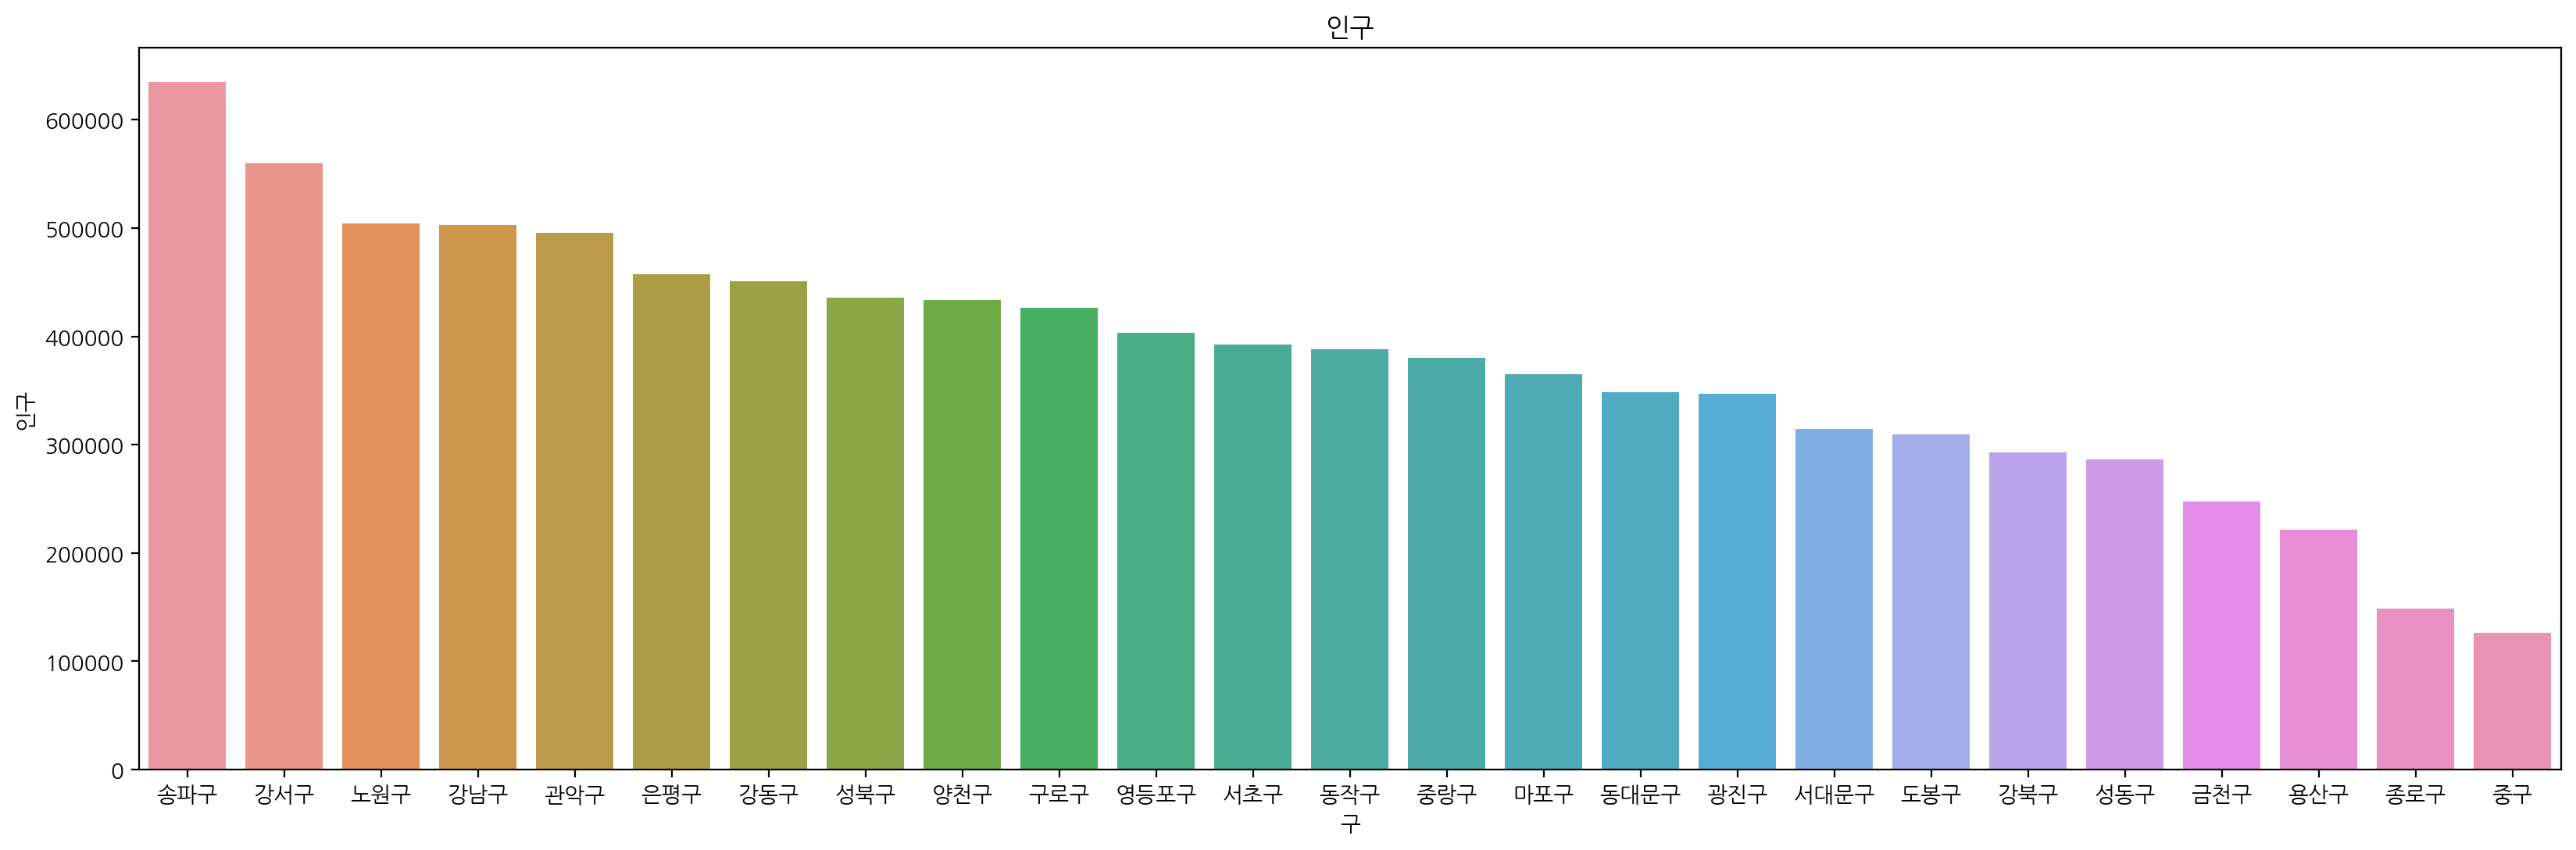

In [33]:
plt.figure(figsize=(20,6))
sns.barplot(data=people, x=people.index, y="인구", ci=None).set_title("인구")

## 서울시 주유소 데이터

In [24]:
oil = pd.read_csv("서울특별시_주유소 현황_20220101.csv", encoding="cp949")
oil.head()

,연번,자치구명,주유소명,주소
0,1,용산구,현대오일뱅크(주) 직영소월길주유소,서울특별시 용산구 소월로66
1,2,용산구,선익상사(주) 동자동주유소,서울특별시 용산구 한강대로 104길 6
2,3,용산구,현대오일뱅크㈜ 직영갈월동주유소,서울특별시 용산구 한강대로 322
3,4,용산구,서계주유소,서울특별시 용산구 청파로 367
4,5,용산구,㈜영원에너지 풍기주유소,서울특별시 용산구 원효로178


In [25]:
oil_df = oil.groupby("자치구명")[["주유소명"]].count()

In [26]:
oil_df.index = oil_df.index.set_names("구")

In [27]:
oil_df = oil_df.rename(columns={"주유소명":"주유소갯수"})

### 서울시 구별 주유소 갯수

In [28]:
oil_df

,주유소갯수
구,
강남구,35
강동구,14
강북구,13
강서구,32
관악구,15
광진구,16
구로구,21
금천구,12
노원구,15


### 인구와 주유소데이터 합치기

In [29]:
df_op = people.merge(oil_df, left_index=True, right_index=True)
df_op

,인구,주유소갯수
구,,
송파구,634720,33
강서구,559837,32
노원구,503929,15
강남구,503019,35
관악구,495777,15
은평구,457385,17
강동구,451099,14
성북구,435509,24
양천구,433373,25


### 전기차 데이터와 합치기

In [30]:
df = df_op.merge(df, left_index=True, right_index=True)
df

,인구,주유소갯수,전기차수,충전소,현재충전소당전기차,미래전기차수
구,,,,,,
송파구,634720,33,1988,2106,0.943970,19082
강서구,559837,32,1776,1596,1.112782,17047
노원구,503929,15,896,1353,0.662232,8600
강남구,503019,35,12173,2252,5.405417,116843
관악구,495777,15,777,594,1.308081,7458
은평구,457385,17,901,1197,0.752715,8648
강동구,451099,14,1293,1272,1.016509,12411
성북구,435509,24,926,1483,0.624410,8888
양천구,433373,25,998,899,1.110122,9579


In [35]:
df.corr()

,인구,주유소갯수,전기차수,충전소,현재충전소당전기차,미래전기차수
인구,1.00000,0.64937,0.31910,0.57080,0.23784,0.31910
주유소갯수,0.64937,1.00000,0.61087,0.71821,0.54532,0.61087
전기차수,0.31910,0.61087,1.00000,0.63939,0.96027,1.00000
충전소,0.57080,0.71821,0.63939,1.00000,0.46356,0.63939
현재충전소당전기차,0.23784,0.54532,0.96027,0.46356,1.00000,0.96027
미래전기차수,0.31910,0.61087,1.00000,0.63939,0.96027,1.00000


<AxesSubplot:>

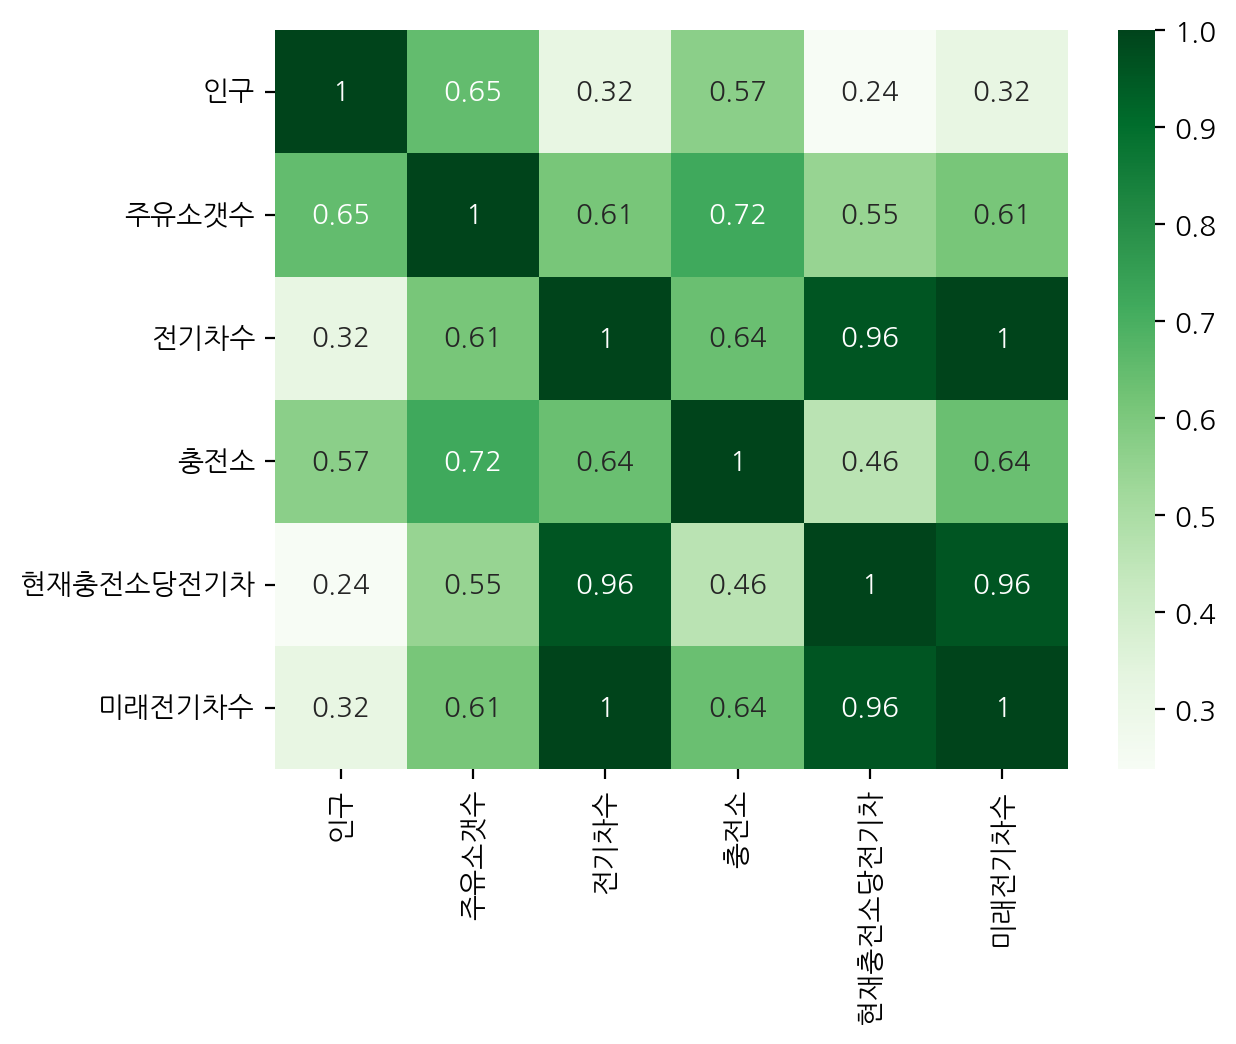

In [37]:
sns.heatmap(df.corr(), annot=True, cmap="Greens")

# 중간인사이트
- 주유소와 충전소의 갯수가 인구보다 더 상관관계에 있다. 
- 인구에 비례하게 하기보다는, 주유소의 비율로 충전소를 늘리는게 더 유의미하다고 생각했다. 
- 휘발유차 대비 얼만큼의 주유소가 있는지 확인해보자

## 서울시 휘발유 자동차 데이터

In [3]:
car_raw = pd.read_csv("21년10월31일 기준 서울시 자동차 등록현황(동별 연료별).csv", encoding="cp949")
car_raw = car_raw[4:]

In [4]:
car_raw["구"] =  car_raw["행정동-연료별 분류"].map(lambda x : x.split()[1].strip())

In [7]:
car_df = car_raw[["구","경유","하이브리드(경유-전기)","하이브리드(휘발유-전기)","휘발유","휘발유(무연)","휘발유(유연)"]]
car_df

,구,경유,하이브리드(경유-전기),하이브리드(휘발유-전기),휘발유,휘발유(무연),휘발유(유연)
4,강남구,3646.0,15.0,376.0,2964.0,2791.0,4.0
5,강남구,NaN,NaN,NaN,NaN,1.0,NaN
6,강남구,3336.0,18.0,1045.0,4071.0,4018.0,10.0
7,강남구,3458.0,17.0,889.0,4403.0,4146.0,12.0
8,강남구,1939.0,5.0,488.0,1775.0,1962.0,1.0
...,...,...,...,...,...,...,...
444,중랑구,1944.0,4.0,166.0,1008.0,1787.0,3.0
445,중랑구,4806.0,6.0,421.0,2126.0,3821.0,3.0
446,중랑구,2370.0,2.0,219.0,1157.0,2130.0,3.0
447,중랑구,2112.0,2.0,142.0,965.0,1800.0,2.0


In [8]:
# 결측치 확인
car_df.isnull().sum()

구                 0
경유                3
하이브리드(경유-전기)     75
하이브리드(휘발유-전기)    22
휘발유              12
휘발유(무연)           9
휘발유(유연)          89
dtype: int64

In [9]:
# 결측치를 0으로 변경
car_df = car_df.fillna(0)

In [10]:
# 구별로 묶어주기
car_df = car_df.groupby("구").sum()

In [11]:
car_df["휘발유자동차수"] = car_df.sum(axis=1).astype(int)

In [12]:
car_df

,경유,하이브리드(경유-전기),하이브리드(휘발유-전기),휘발유,휘발유(무연),휘발유(유연),휘발유자동차수
구,,,,,,,
강남구,58028.0,260.0,13562.0,57096.0,56872.0,76.0,185894
강동구,51743.0,87.0,6512.0,30220.0,47616.0,57.0,136235
강북구,27457.0,23.0,2119.0,13196.0,23432.0,20.0,66247
강서구,69132.0,96.0,10387.0,38463.0,63633.0,66.0,181777
관악구,41324.0,36.0,4327.0,22432.0,38518.0,55.0,106692
광진구,36063.0,90.0,3690.0,20229.0,29805.0,32.0,89909
구로구,53887.0,43.0,4847.0,24688.0,44649.0,42.0,128156
금천구,36609.0,49.0,2784.0,14130.0,27535.0,39.0,81146
노원구,49714.0,39.0,5446.0,28313.0,50268.0,48.0,133828


### 구별 휘발유 자동차 수

In [22]:
car_df = car_df[["휘발유자동차수"]]
car_df

,휘발유자동차수
구,
강남구,185894
강동구,136235
강북구,66247
강서구,181777
관악구,106692
광진구,89909
구로구,128156
금천구,81146
노원구,133828


In [71]:
car_s = car_df["휘발유자동차수"].sort_values(ascending=False)

In [75]:
pd.DataFrame(car_s).head()

,휘발유자동차수
구,
송파구,226642
강남구,185894
강서구,181777
서초구,166410
강동구,136235


### df 와 합치기

In [39]:
df = df.merge(car_df, left_index=True, right_index=True)
df

,인구,주유소갯수,전기차수,충전소,현재충전소당전기차,미래전기차수,경유,하이브리드(경유-전기),하이브리드(휘발유-전기),휘발유,휘발유(무연),휘발유(유연),휘발유자동차수
구,,,,,,,,,,,,,
송파구,634720,33,1988,2106,0.943970,19082,85865.0,186.0,11384.0,55351.0,73759.0,97.0,226642
강서구,559837,32,1776,1596,1.112782,17047,69132.0,96.0,10387.0,38463.0,63633.0,66.0,181777
노원구,503929,15,896,1353,0.662232,8600,49714.0,39.0,5446.0,28313.0,50268.0,48.0,133828
강남구,503019,35,12173,2252,5.405417,116843,58028.0,260.0,13562.0,57096.0,56872.0,76.0,185894
관악구,495777,15,777,594,1.308081,7458,41324.0,36.0,4327.0,22432.0,38518.0,55.0,106692
은평구,457385,17,901,1197,0.752715,8648,44612.0,44.0,4709.0,26134.0,42880.0,46.0,118425
강동구,451099,14,1293,1272,1.016509,12411,51743.0,87.0,6512.0,30220.0,47616.0,57.0,136235
성북구,435509,24,926,1483,0.624410,8888,41912.0,62.0,4652.0,24553.0,38750.0,38.0,109967
양천구,433373,25,998,899,1.110122,9579,50228.0,74.0,5974.0,32153.0,47399.0,42.0,135870


### 주유소당 휘발유자동차 수  

In [40]:
df["주유소당자동차"] = df["휘발유자동차수"] / df["주유소갯수"]

### 자동차당 주유소

In [41]:
df["자동차당주유소비율"] = df["주유소갯수"] / df["휘발유자동차수"] * 100

In [42]:
df

,인구,주유소갯수,전기차수,충전소,현재충전소당전기차,미래전기차수,경유,하이브리드(경유-전기),하이브리드(휘발유-전기),휘발유,휘발유(무연),휘발유(유연),휘발유자동차수,주유소당자동차,자동차당주유소비율
구,,,,,,,,,,,,,,,
송파구,634720,33,1988,2106,0.943970,19082,85865.0,186.0,11384.0,55351.0,73759.0,97.0,226642,6867.939394,0.014560
강서구,559837,32,1776,1596,1.112782,17047,69132.0,96.0,10387.0,38463.0,63633.0,66.0,181777,5680.531250,0.017604
노원구,503929,15,896,1353,0.662232,8600,49714.0,39.0,5446.0,28313.0,50268.0,48.0,133828,8921.866667,0.011208
강남구,503019,35,12173,2252,5.405417,116843,58028.0,260.0,13562.0,57096.0,56872.0,76.0,185894,5311.257143,0.018828
관악구,495777,15,777,594,1.308081,7458,41324.0,36.0,4327.0,22432.0,38518.0,55.0,106692,7112.800000,0.014059
은평구,457385,17,901,1197,0.752715,8648,44612.0,44.0,4709.0,26134.0,42880.0,46.0,118425,6966.176471,0.014355
강동구,451099,14,1293,1272,1.016509,12411,51743.0,87.0,6512.0,30220.0,47616.0,57.0,136235,9731.071429,0.010276
성북구,435509,24,926,1483,0.624410,8888,41912.0,62.0,4652.0,24553.0,38750.0,38.0,109967,4581.958333,0.021825
양천구,433373,25,998,899,1.110122,9579,50228.0,74.0,5974.0,32153.0,47399.0,42.0,135870,5434.800000,0.018400


In [43]:
df.shape

(25, 15)

## 자동차당주유소 비율에 맞게 전기차 충전소를 배치해보자

In [88]:
# 서울시가 목표로 하는 충전소갯수
seoul_ev

NameError: name 'seoul_ev' is not defined

In [89]:
# 자동차당주유소비율로 전기차 충전소 갯수 추천
(df["자동차당주유소비율"] * df["미래전기차수"] * 37).sum()

260029.803241865

In [90]:
df["주유소비율로본미래충전소갯수"] = (df["자동차당주유소비율"] * df["미래전기차수"] * 37)

Text(0.5, 1.0, '주유소비율로본미래충전소갯수')

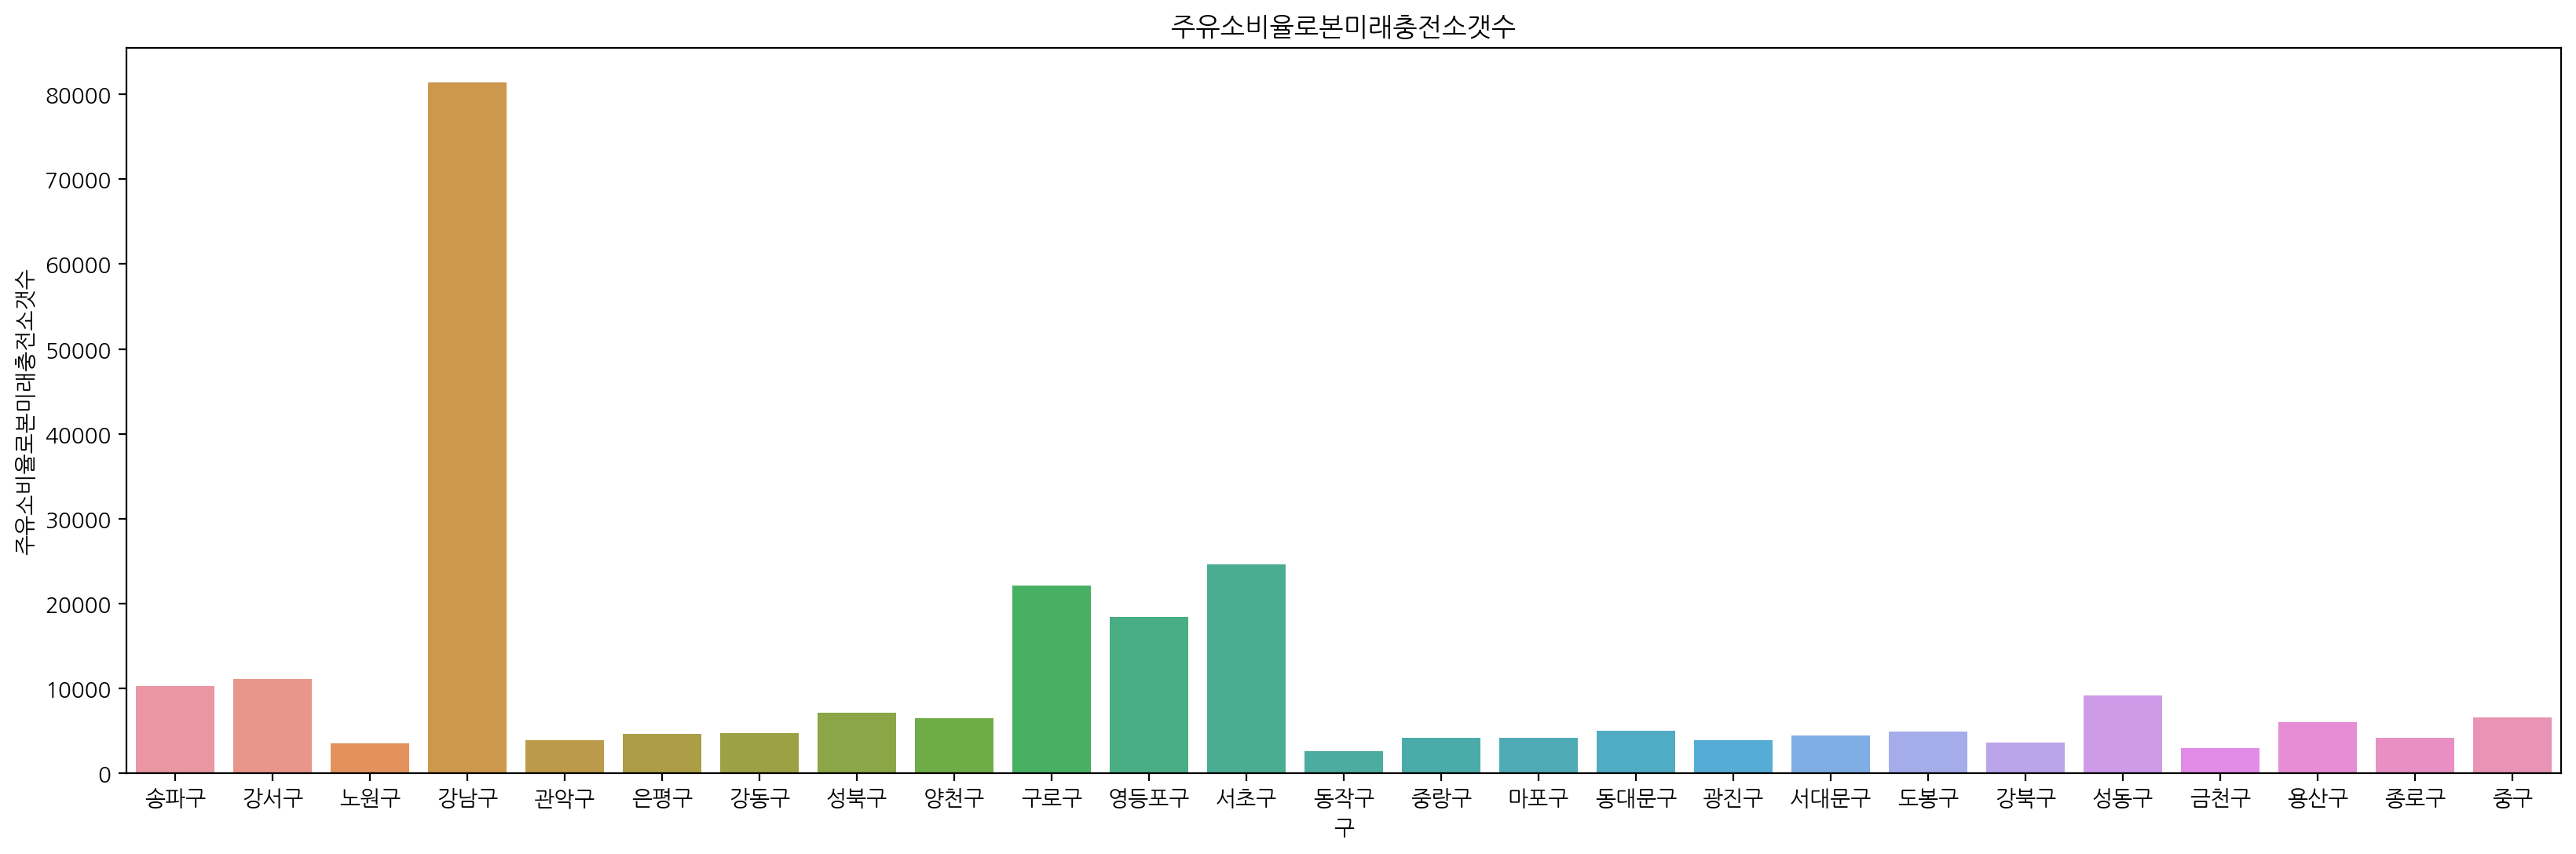

In [102]:
plt.figure(figsize=(20,6))
sns.barplot(data=df, x=df.index, y="주유소비율로본미래충전소갯수", ci=None).set_title("주유소비율로본미래충전소갯수")

In [251]:
df["미래충전소당전기차예측(주유소기준)"] = df["미래전기차수"] / df["주유소비율로본미래충전소갯수"]
df["미래충전소당전기차예측(주유소기준)"]

구
송파구    1.85620
강서구    1.53528
노원구    2.41132
강남구    1.67206
관악구    1.92238
은평구    1.88275
강동구    2.63002
성북구    1.23837
양천구    1.46886
구로구    1.64937
영등포구   1.24515
서초구    1.36290
동작구    2.64808
중랑구    1.79375
마포구    2.50705
동대문구   1.26428
광진구    1.51873
서대문구   1.45232
도봉구    1.25087
강북구    1.37728
성동구    1.53111
금천구    1.82761
용산구    1.55378
종로구    1.40378
중구     1.40799
Name: 미래충전소당전기차예측(주유소기준), dtype: float64

Text(0.5, 1.0, '미래충전소당전기차예측(주유소기준)')

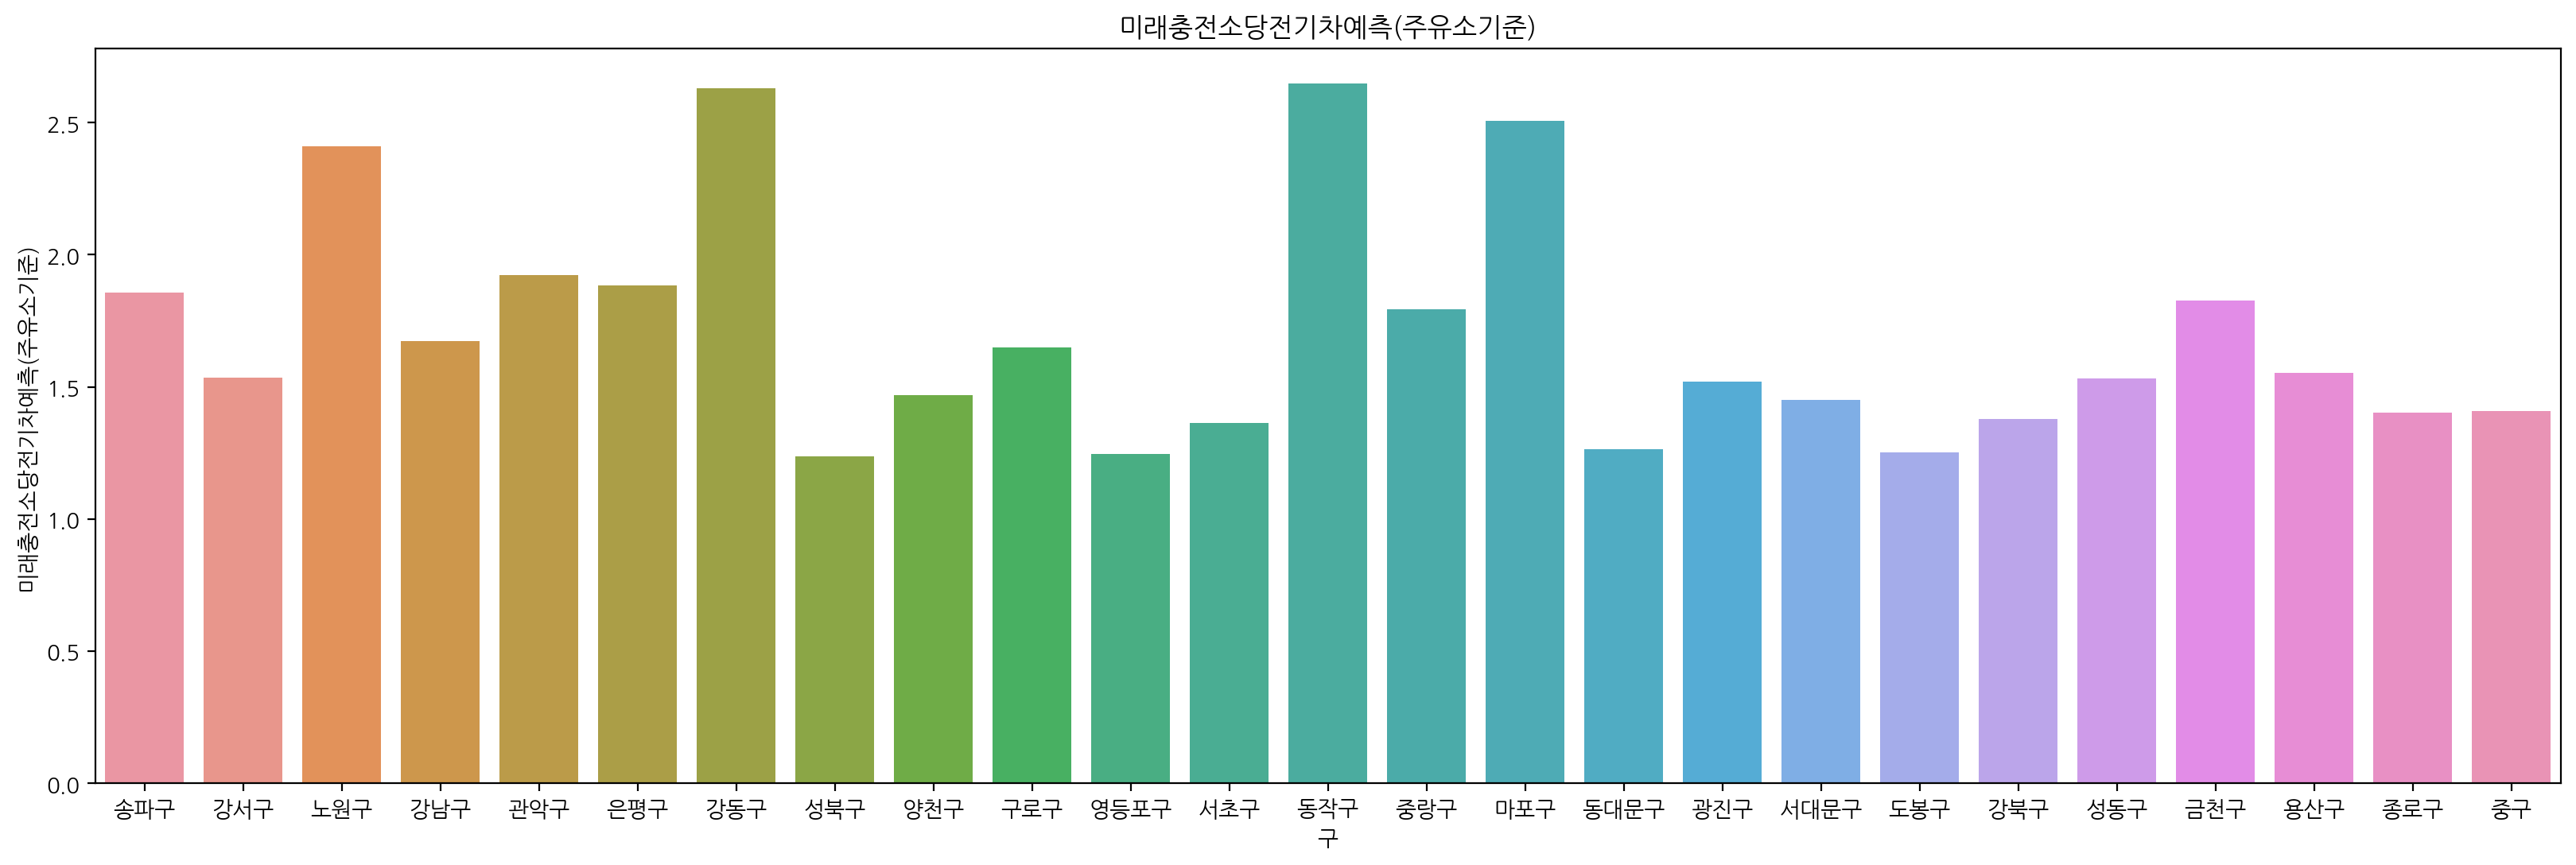

In [274]:
plt.figure(figsize=(20,6))
sns.barplot(data=df, x=df.index, y="미래충전소당전기차예측(주유소기준)", ci=None).set_title("미래충전소당전기차예측(주유소기준)")

### 만약 인구비로 충전소를 늘린다면?
- 인구가 많은 쪽에 충전소를 늘려야 한다고 접근하면 어떻게 될까?


In [178]:
df["인구비"] = df["인구"] / df["인구"].sum()

In [263]:
seoul_ev

249556

In [272]:
(df["인구비"] * df["미래전기차수"] * 13.7).sum()

249381.5231770858

In [179]:
df["인구비율로본미래충전소갯수"] = (df["인구비"] * df["미래전기차수"] * 13.7)

Text(0.5, 1.0, '인구비율로본미래충전소갯수')

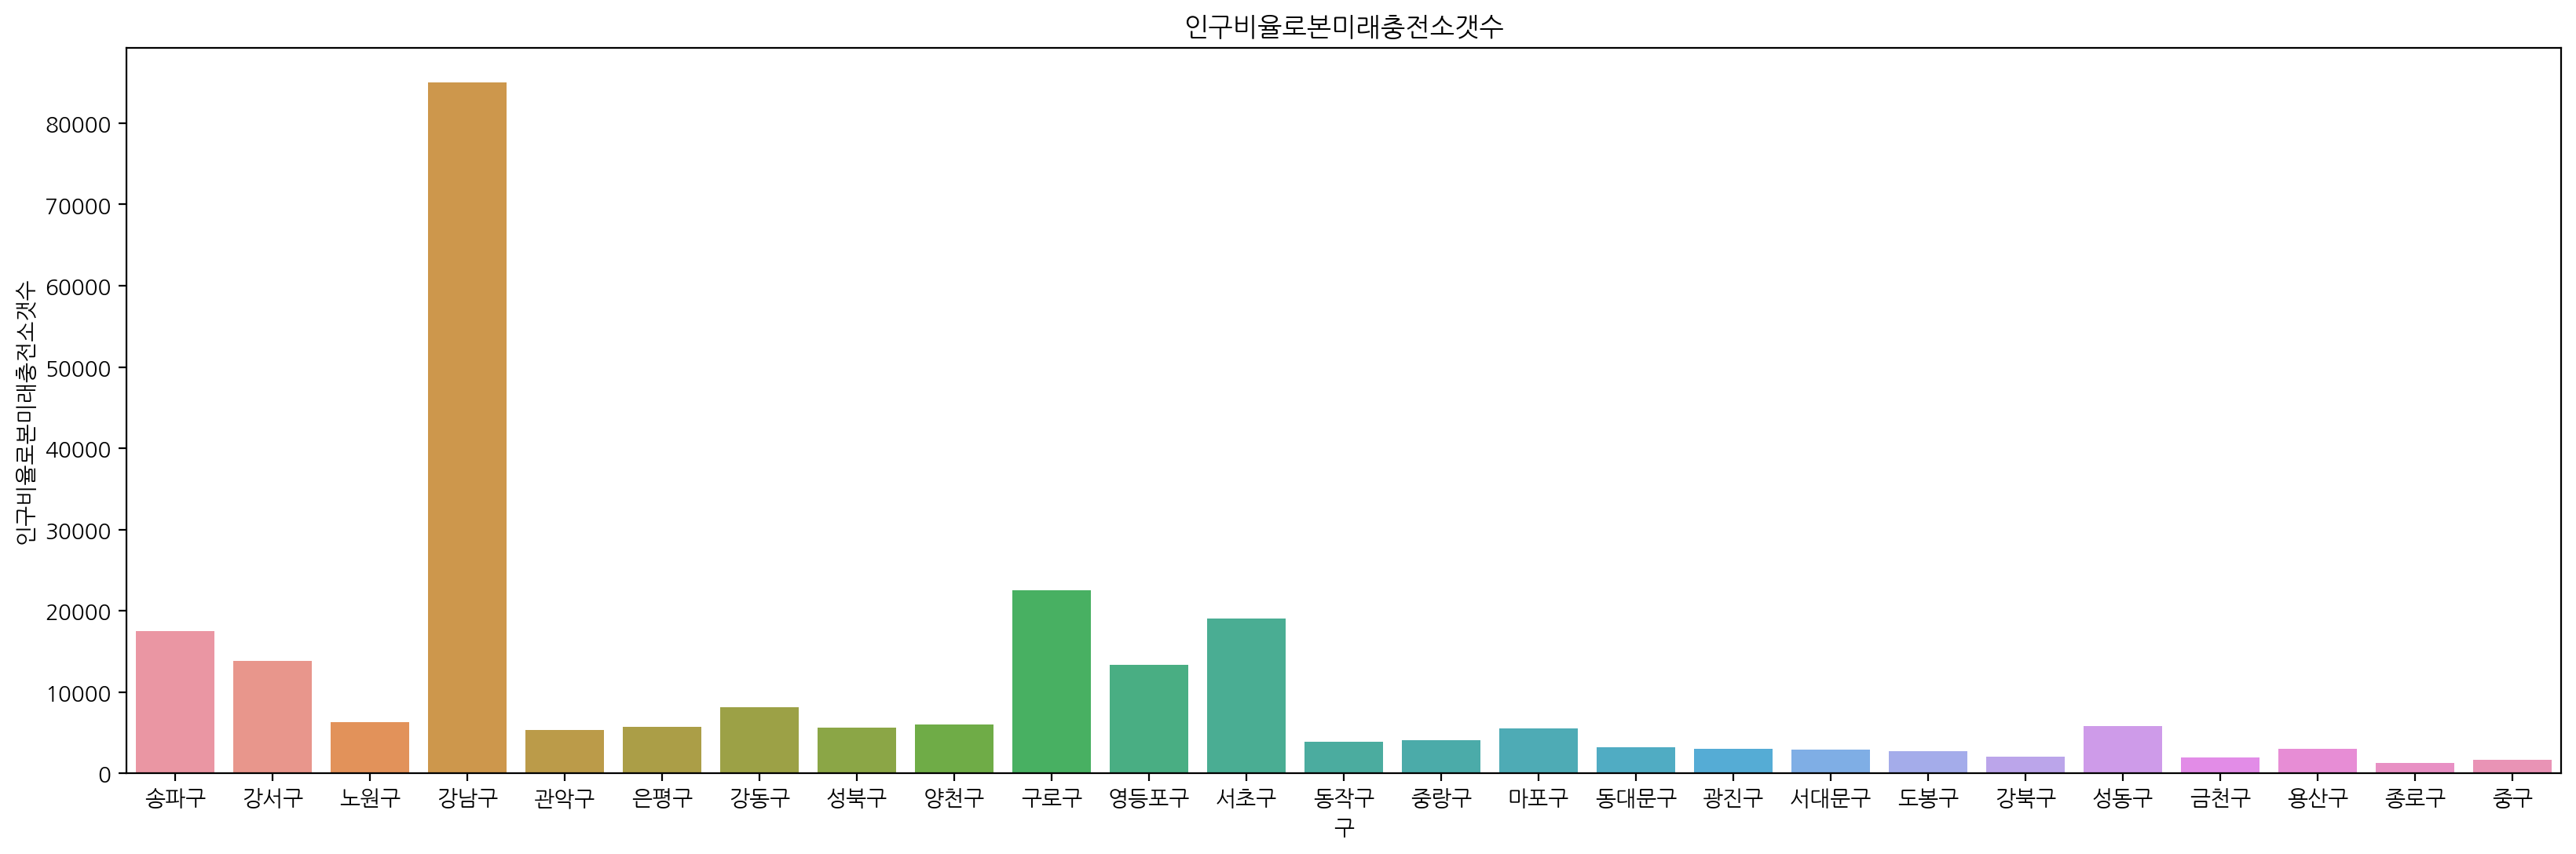

In [276]:
plt.figure(figsize=(20,6))
sns.barplot(data=df, x=df.index, y="인구비율로본미래충전소갯수", ci=None).set_title("인구비율로본미래충전소갯수")

In [180]:
df["미래충전소당전기차예측(인구기준)"] = df["미래전기차수"] / df["인구비율로본미래충전소갯수"]

Text(0.5, 1.0, '미래충전소당전기차예측(인구기준)')

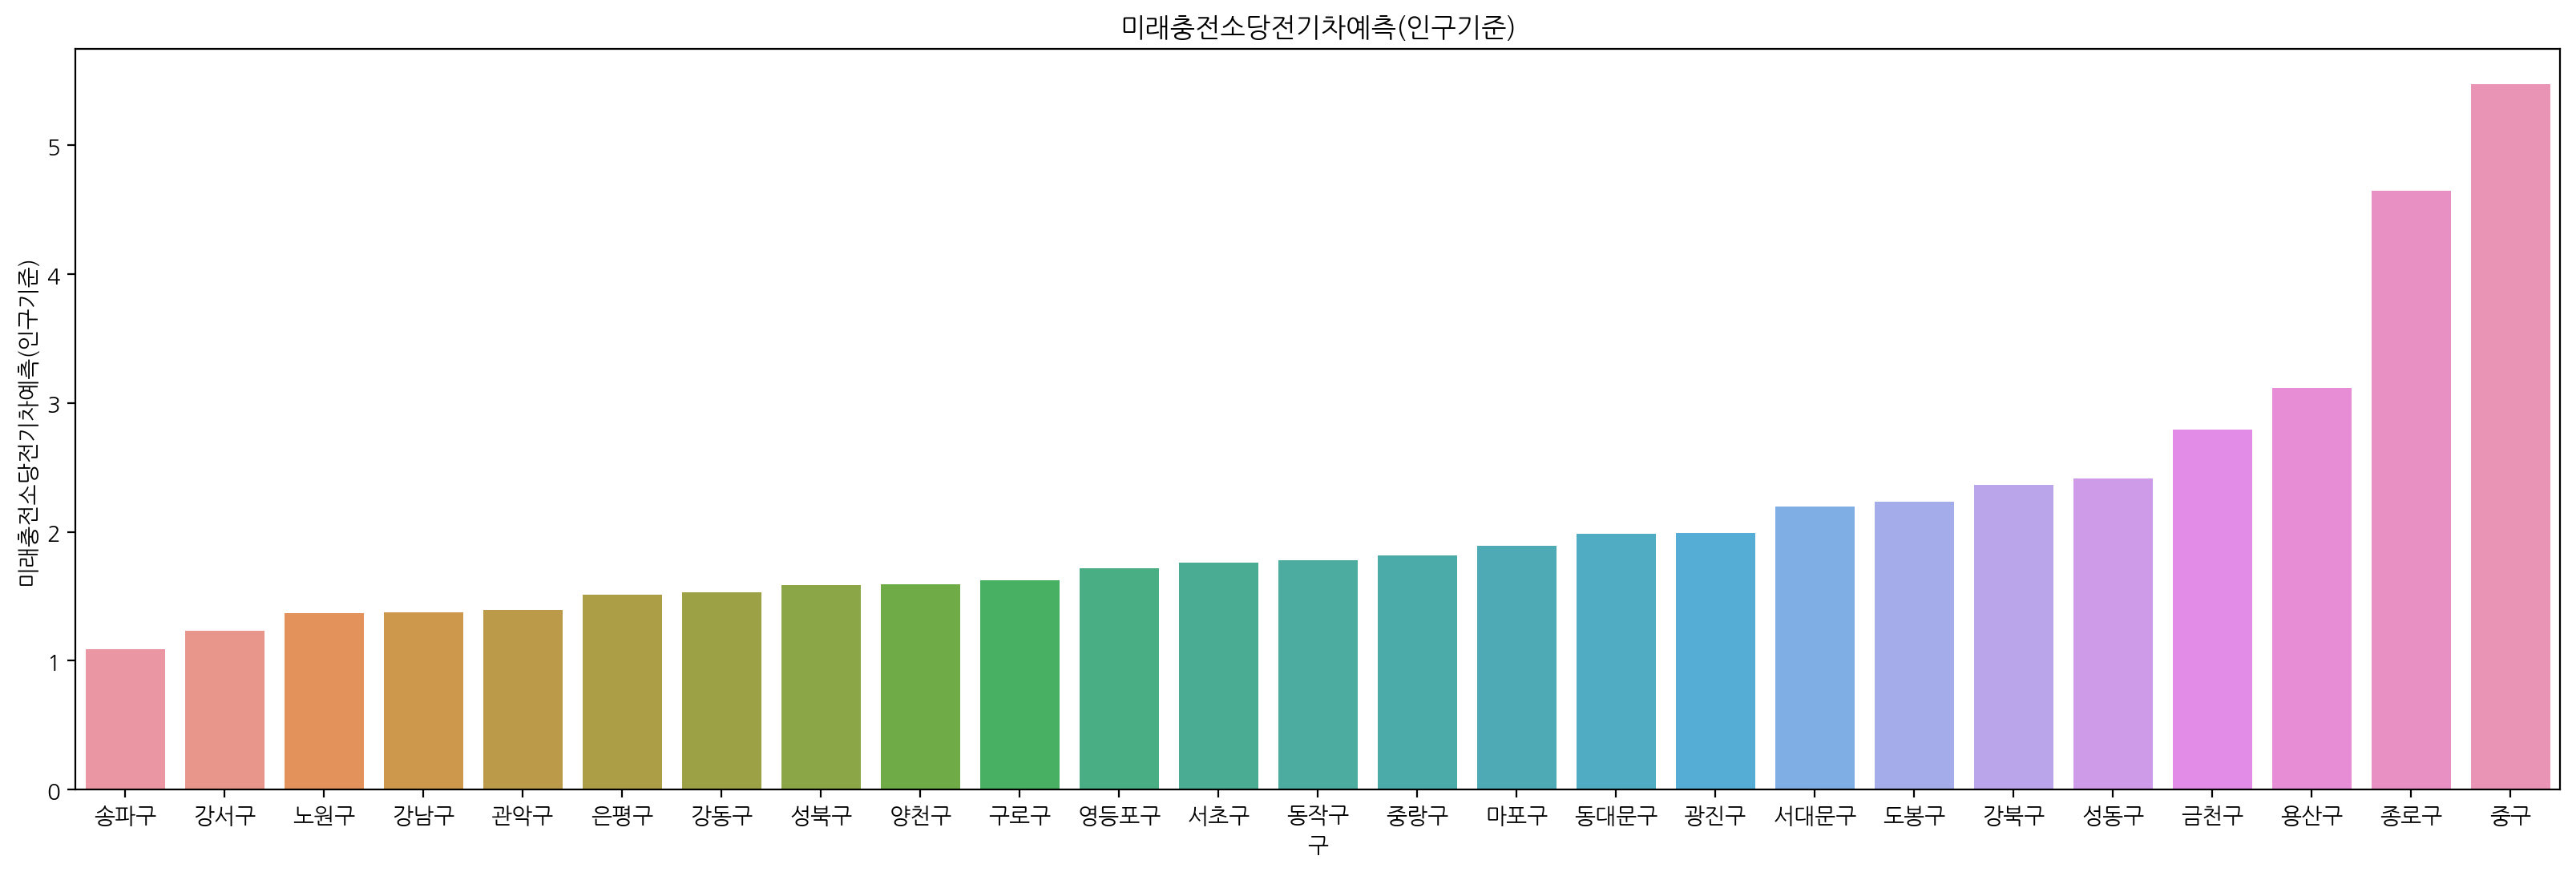

In [279]:
plt.figure(figsize=(20,6))
sns.barplot(data=df, x=df.index, y="미래충전소당전기차예측(인구기준)", ci=None).set_title("미래충전소당전기차예측(인구기준)")

- 인구비로 늘렸을때는, 종로구, 중구 등에서 전기차 예상수요를 따라가지 못하는걸로 보인다. 

In [133]:
df["휘발유자동차수"]

구
송파구     226642
강서구     181777
노원구     133828
강남구     185894
관악구     106692
은평구     118425
강동구     136235
성북구     109967
양천구     135870
구로구     128156
영등포구    133605
서초구     166410
동작구      97979
중랑구      99553
마포구     111313
동대문구     88879
광진구      89909
서대문구     80604
도봉구      83308
강북구      66247
성동구      96307
금천구      81146
용산구      74737
종로구      46746
중구       57305
Name: 휘발유자동차수, dtype: int32

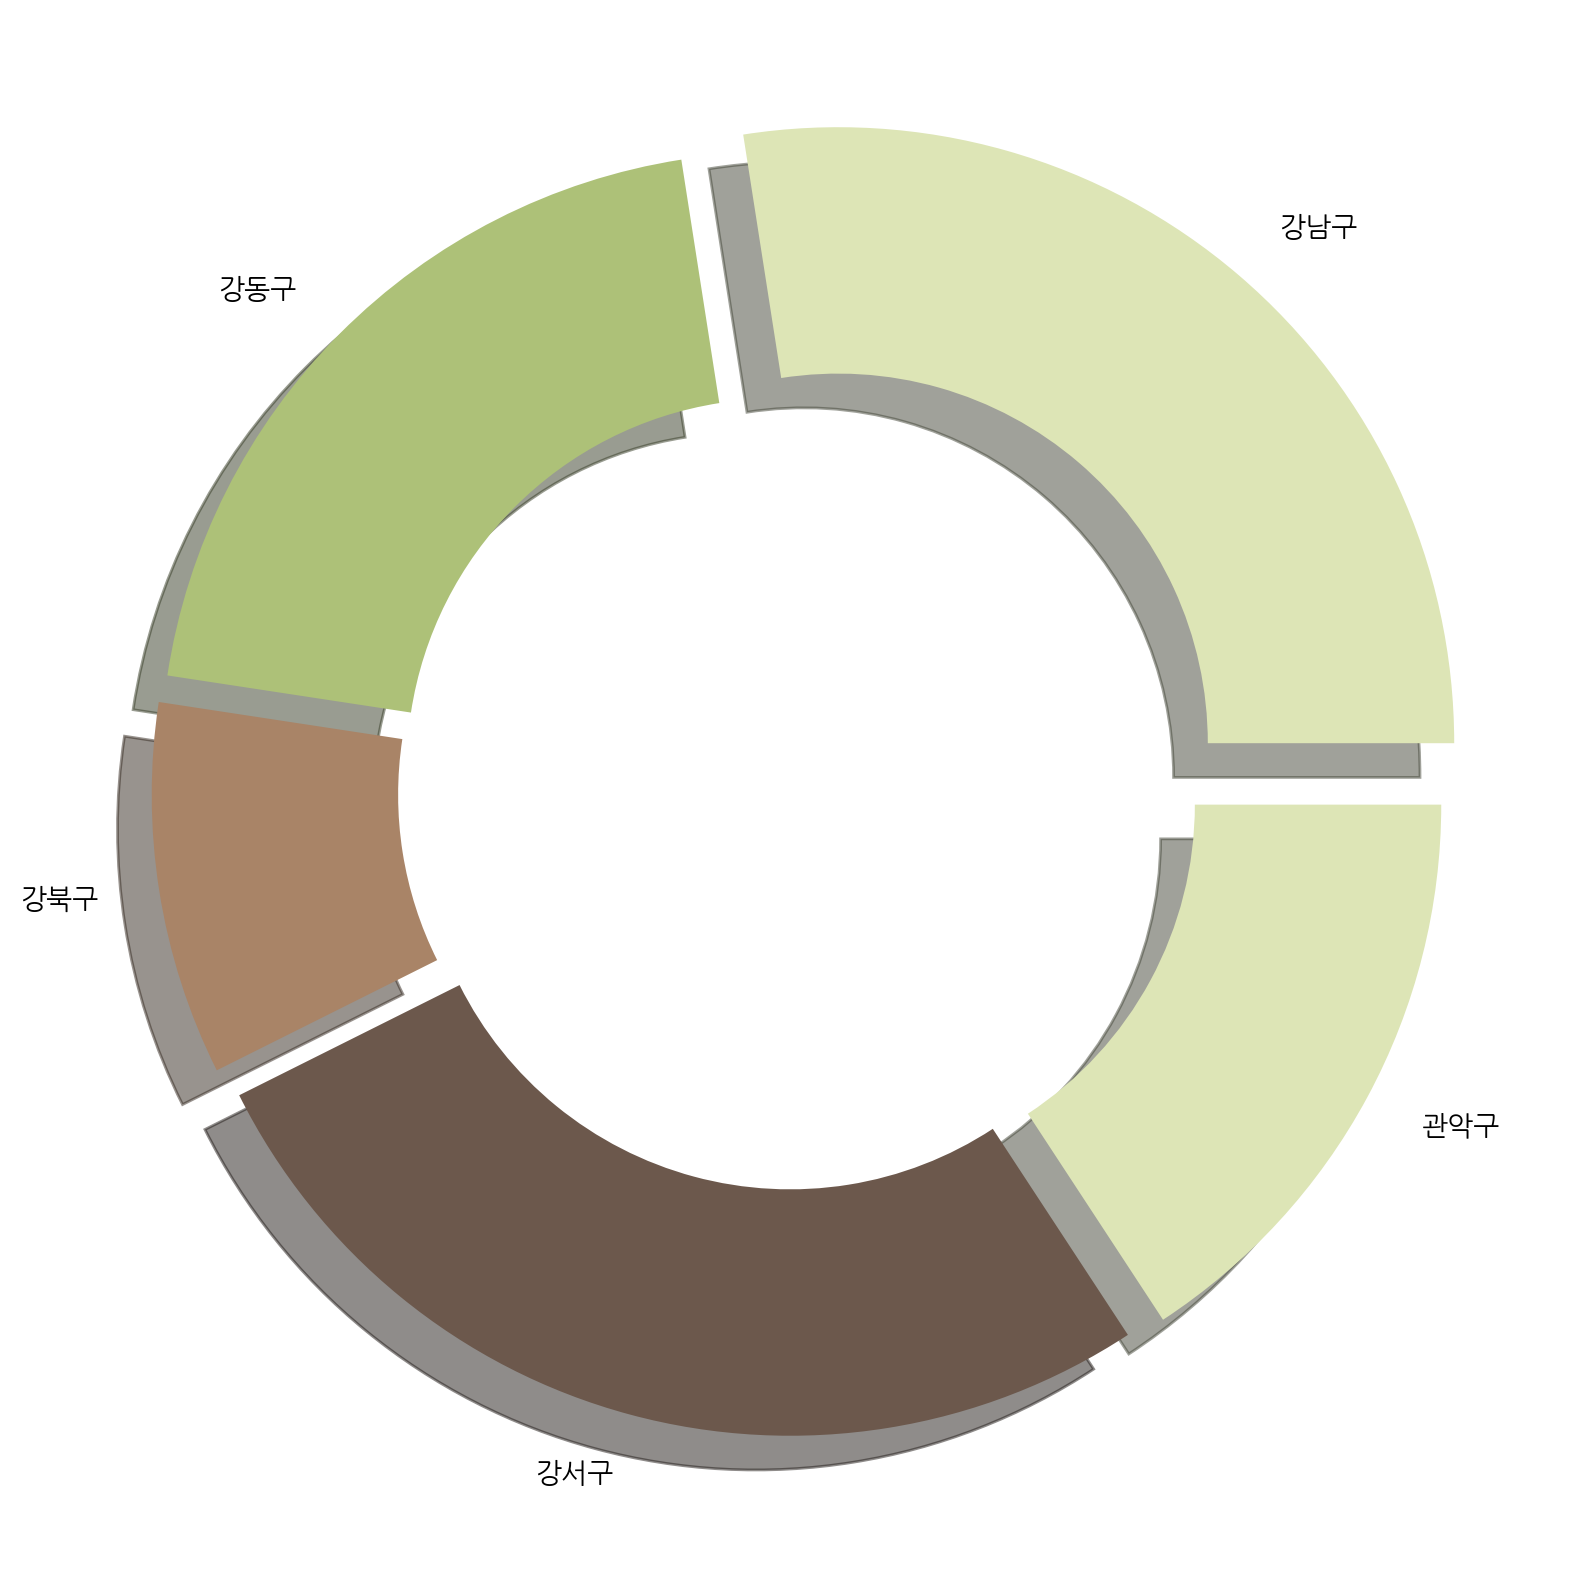

In [110]:
plt.figure(figsize=(30,10))
my_colours = ["#dde5b6", "#adc178", "#a98467", "#6c584c"]
wed={"width": 0.4}
explode = [0.1,0.05, 0.05,0.05,0.05]
plt.pie(car5["휘발유자동차수"],labels=car5.index,colors=my_colours,explode=explode,wedgeprops=wed,shadow=True)
plt.show()

In [194]:
df

,인구,주유소갯수,전기차수,충전소,미래전기차수,현재충전소당전기차,휘발유자동차수,주유소당자동차,자동차당주유소비율,주유소비율로본미래충전소갯수,인구비,인구비율로본미래충전소갯수,미래충전소당전기차예측(인구기준)
구,,,,,,,,,,,,,
송파구,634720,33,1988,2106,19082,0.94397,226642,6867.93939,0.01456,10280.14313,0.06701,17517.78248,1.08929
강서구,559837,32,1776,1596,17047,1.11278,181777,5680.53125,0.01760,11103.52135,0.05910,13803.29005,1.23500
노원구,503929,15,896,1353,8600,0.66223,133828,8921.86667,0.01121,3566.51822,0.05320,6268.17132,1.37201
강남구,503019,35,12173,2252,116843,5.40542,185894,5311.25714,0.01883,81396.75568,0.05311,85008.06752,1.37449
관악구,495777,15,777,594,7458,1.30808,106692,7112.80000,0.01406,3879.56923,0.05234,5347.88191,1.39457
은평구,457385,17,901,1197,8648,0.75272,118425,6966.17647,0.01436,4593.28014,0.04829,5720.98295,1.51163
강동구,451099,14,1293,1272,12411,1.01651,136235,9731.07143,0.01028,4718.97677,0.04762,8097.51376,1.53269
성북구,435509,24,926,1483,8888,0.62441,109967,4581.95833,0.02182,7177.19316,0.04598,5598.53291,1.58756
양천구,433373,25,998,899,9579,1.11012,135870,5434.80000,0.01840,6521.36233,0.04575,6004.19901,1.59538


In [39]:
from sklearn.datasets import load_boston

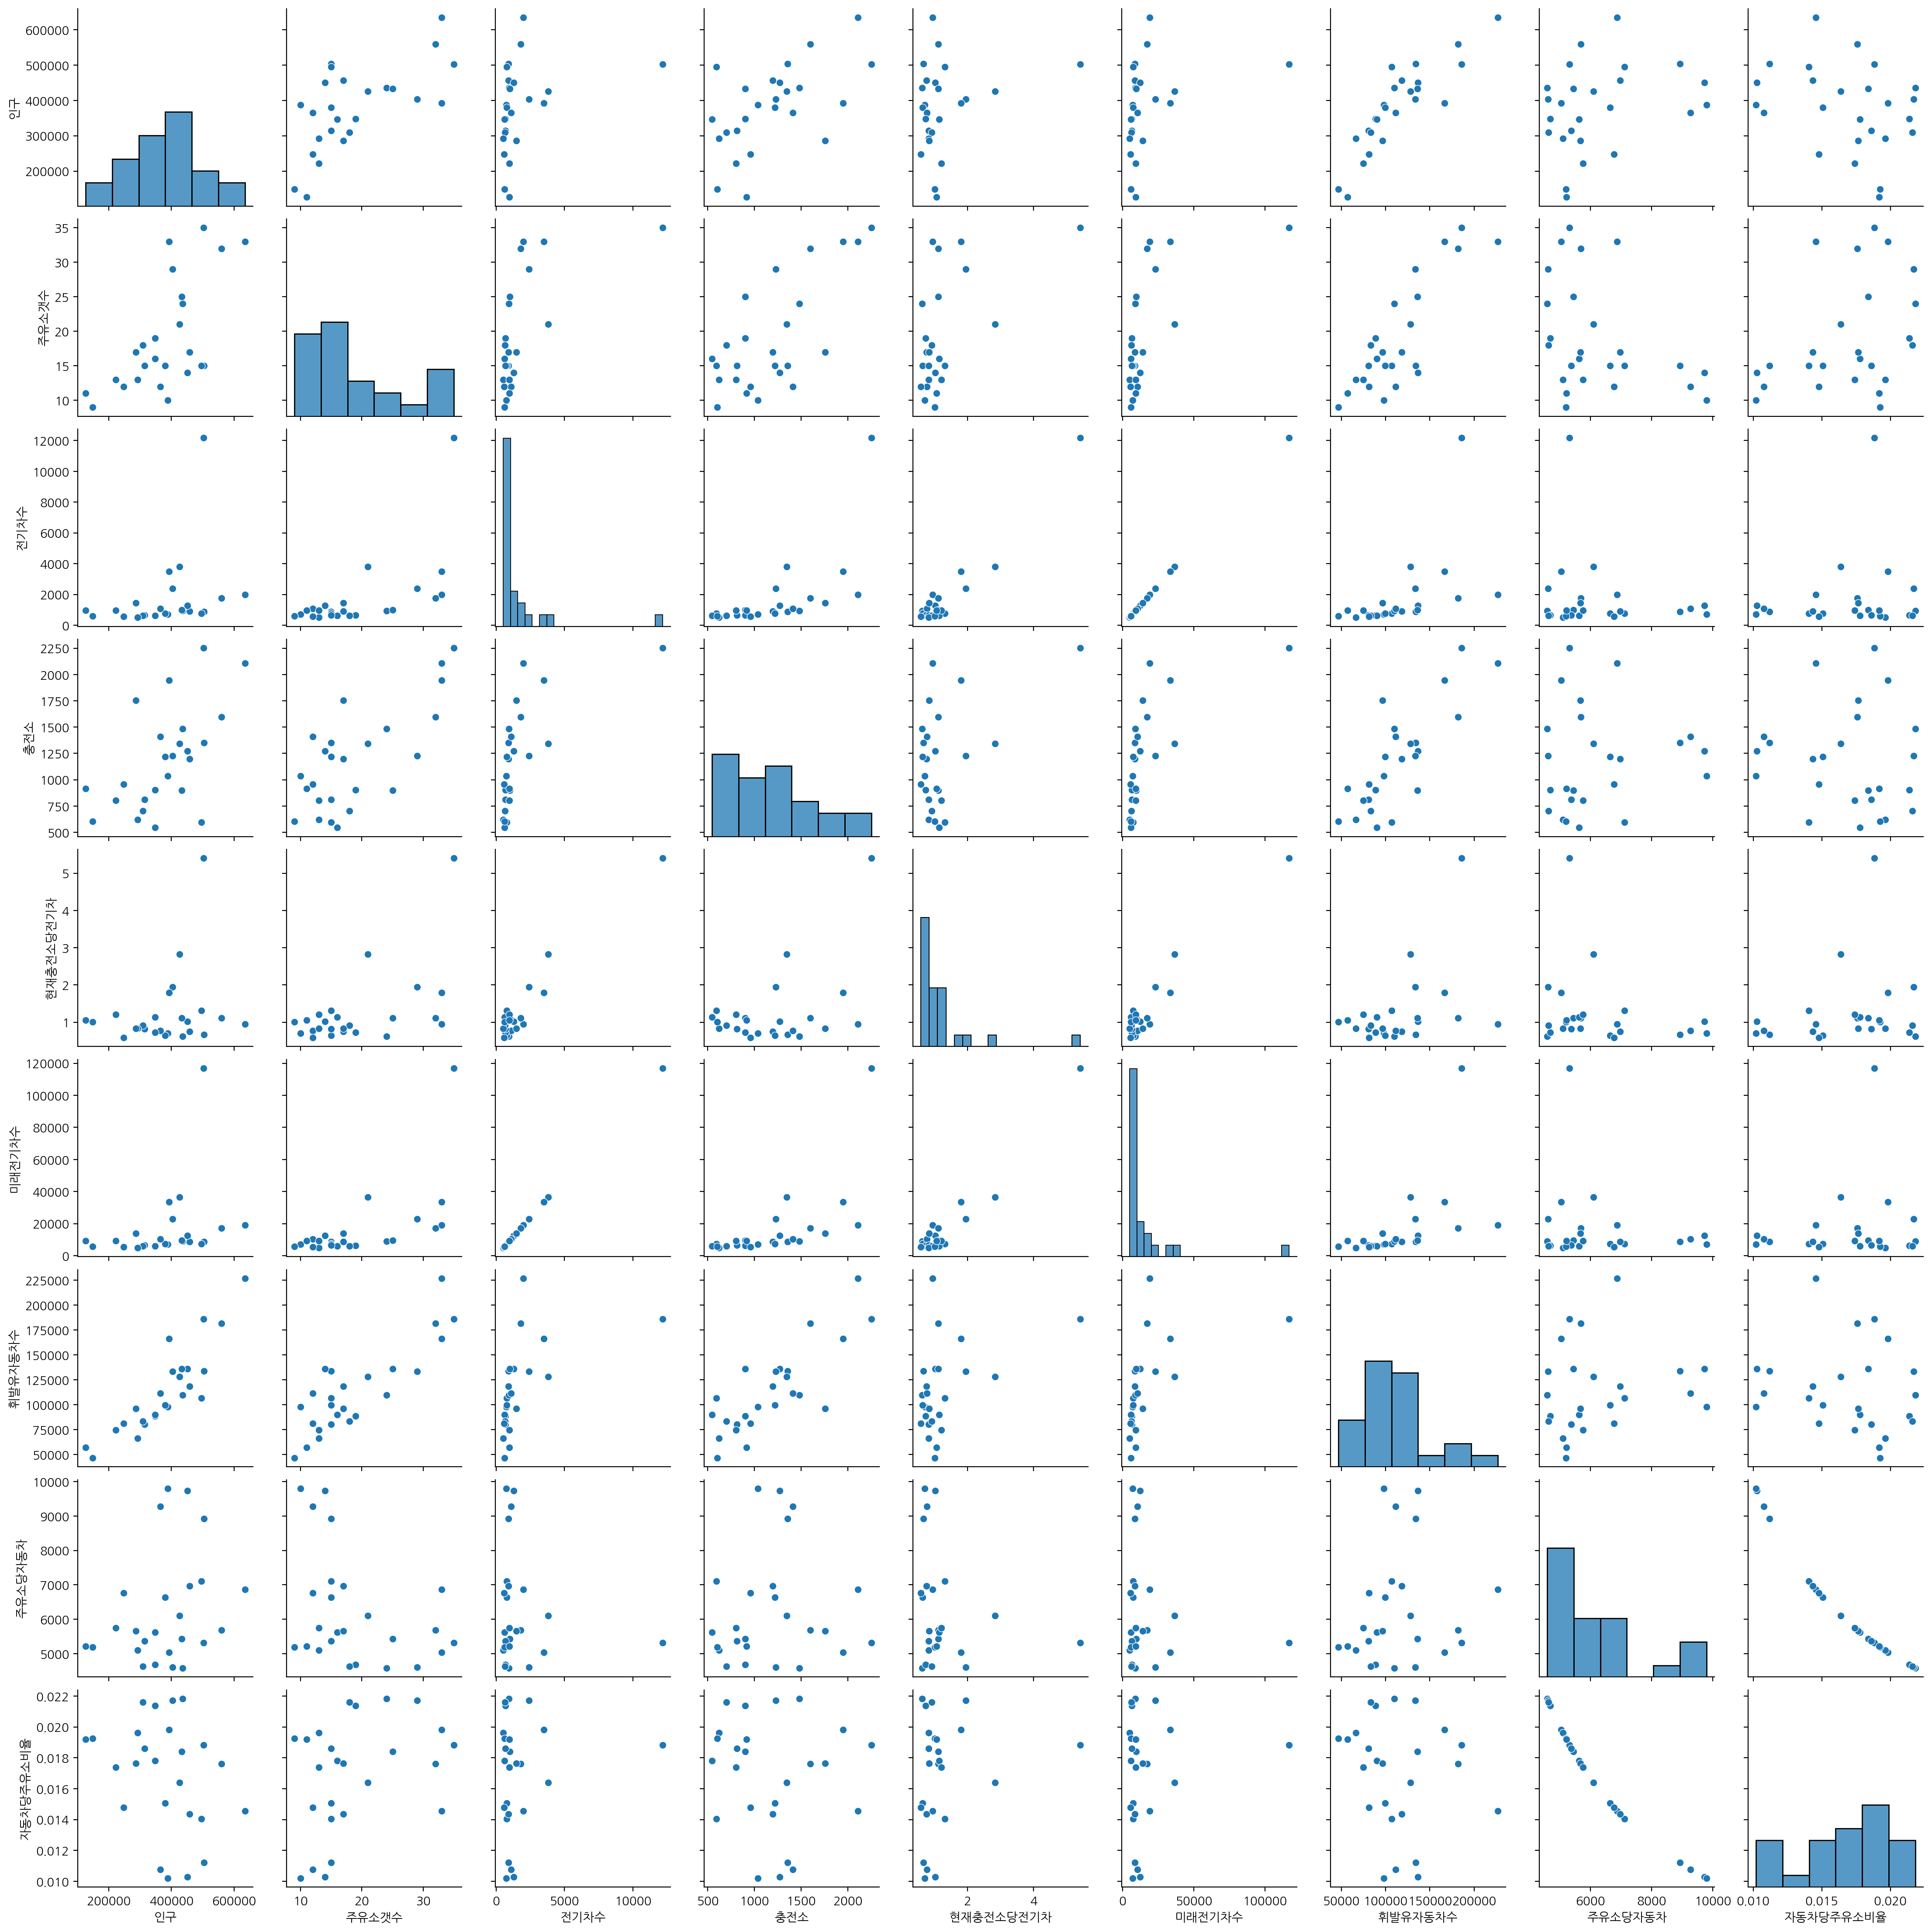

In [40]:
sns.pairplot(df)
plt.show()